In [15]:
from classes import *

1.Automate Deterministe: 

In [16]:
K =automate(["a","b","c"],[1,2,3],[1,2],[3],[(1,"a",2),(1,"b",3),(2,"b",3)])
kdeterminist = K.determinist()

red : input
blue  : current
cyan : input / current
double circle: output


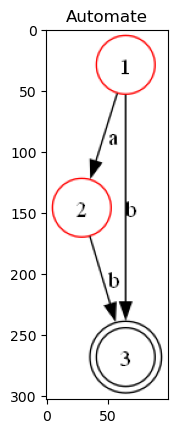

In [17]:
K.imshow()

red : input
blue  : current
cyan : input / current
double circle: output


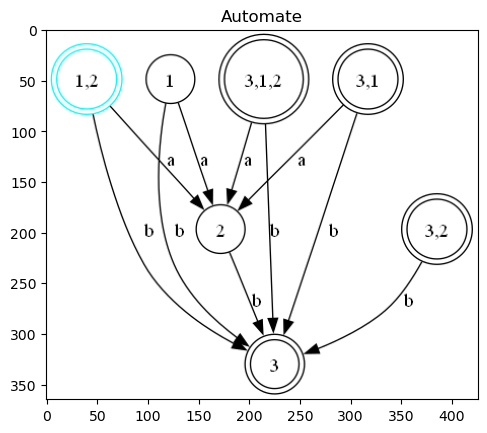

In [18]:
kdeterminist.imshow()

2.Automate Complete : 

In [19]:
K =automate(["a","b"],[0,1],[0],[1],[(0,"a",0),(1,"b",1),(0,"a",1)])
kcomplete = K.complet()

red : input
blue  : current
cyan : input / current
double circle: output


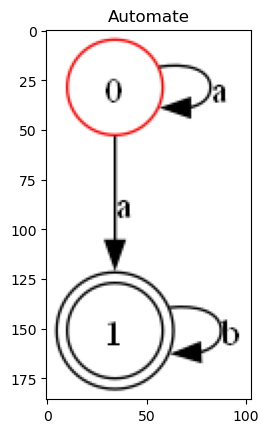

In [20]:
K.imshow()

red : input
blue  : current
cyan : input / current
double circle: output


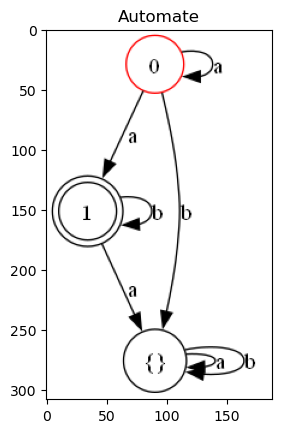

In [21]:
kcomplete.imshow()

3.Automate minimale:

In [22]:
K =automate(["a","b"],[0,1,2,3,4,5,6,7,8,9],[1],[7],[(1,"b",2),(1,"a",4),(2,"a",3),(2,"b",0),(0,"a",0),(0,"b",0),(4,"b",5),(4,"a",7),(3,"a",7),(3,"b",6),(7,"b",6),(7,"a",7),(5,"a",8),(5,"b",7),(6,"a",9),(6,"b",7),(8,"a",5),(8,"b",9),(9,"a",6),(9,"b",8)])
kminimal = K.minimal()

red : input
blue  : current
cyan : input / current
double circle: output


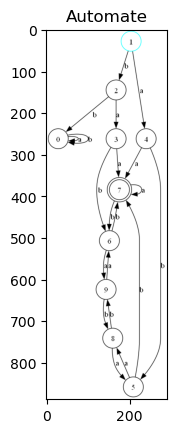

In [23]:
K.imshow()

red : input
blue  : current
cyan : input / current
double circle: output


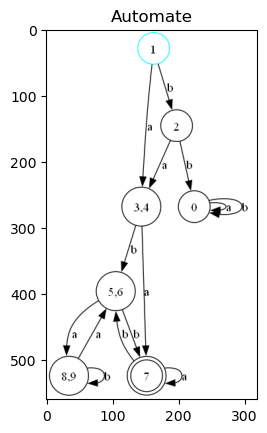

In [24]:
kminimal.imshow()

4.AI mini Project :

In [25]:
A =automate(['done', 'else','do'], ["Verifying Integrity","Pre-Processing", "Defining Model","Loading Model", "Arranging Data", "Predict and Classify", "Feedback","Training Model", "Saving Model", "finished"], ["Verifying Integrity"], ["finished"],      
        [("Verifying Integrity", 'do', "Loading Model"),("Verifying Integrity", 'else', "finished"),
        ("Loading Model", 'done', "Verifying Integrity"), ("Loading Model", 'else', "Defining Model"),
        ("Defining Model", 'do', "Pre-Processing"), ("Training Model", 'do', "Saving Model"),
        ("Pre-Processing", 'do', "Training Model"), ("Saving Model", 'do', "Feedback"),
        ("Saving Model", 'else', "Verifying Integrity"), ("Verifying Integrity", 'done', "Arranging Data"),
        ("Arranging Data", 'else', "finished"), ("Arranging Data", 'do', "Pre-Processing"), ("Pre-Processing", 'do', "Predict and Classify"),
        ("Predict and Classify", 'do', "Pre-Processing"), ("Predict and Classify", 'done', "Feedback"),("finished", 'do', "Verifying Integrity"),
        ("Feedback", 'do', "Pre-Processing"),("Feedback", 'done', "finished"),("Saving Model", 'done', "Arranging Data"),("Arranging Data", 'done', "Feedback")])


red : input
blue  : current
cyan : input / current
double circle: output


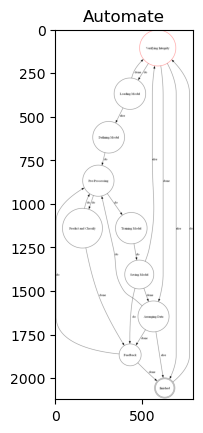

In [26]:
A.imshow()

Verifying Integrity,do,Verifying Integrity
The Verifying Integrity doenst have do transition to go to Verifying Integrity
verifying integrity
Verifying Integrity,do,Loading Model
Loading Model,done,Verifying Integrity
Verifying Integrity,do,Loading Model
Loading Model,else,Defining Model
Defining Model,do,Pre-Processing
Pre-Processing,do,Training Model
Epoch 1/10
162/162 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8772 - loss: 0.4445
Epoch 2/10
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9749 - loss: 0.0859
Epoch 3/10
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9901 - loss: 0.0398
Epoch 4/10
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9940 - loss: 0.0251
Epoch 5/10
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9944 - loss: 0.0153
Epoch 6/10
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9970 - loss: 0.0097
Epoch 7/10
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9979 - loss: 0.0073
Epoch 8/10
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 

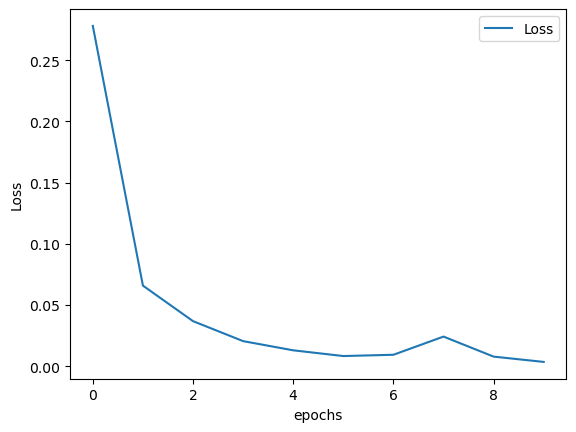

In [27]:
import imghdr
import os
from pandas import DataFrame
import PIL.Image
import  tensorflow as tf 
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Input,Embedding,Dropout,LSTM,TextVectorization
from tensorflow.keras.utils import image_dataset_from_directory
import shutil
from PIL import Image
import numpy as np
import pandas as pd 


CNN = Model("CNN") 
spamdet = Model("SpamDetector")


def verifyintegrity():
    A.proceed("do","Verifying Integrity")
    print("verifying integrity")
    if not os.path.exists("data"):
        os.mkdir("data")
        os.mkdir(pathimgs)
        os.mkdir(pathtext)
        print("Sadly we couldn't find the folder data so we created one for you")
        print("On the folder data/images put 2 folders each one full with pictures about the thing to predict it")
        print("On the folder data/text put the svg for spam")
        A.proceed("else","finished")

        exit(4)

    pathimgs = os.path.join("data","images")
    pathtext = os.path.join("data","text")
    if (os.path.exists(pathimgs) and os.listdir(pathimgs)):
        #change to load 
        A.proceed("do","Loading Model")
        if not CNN.loadfromsave():
            #change to define 
            A.proceed("else","Defining Model")
            layers = [
                Input((255, 255, 3)),
                Conv2D(16, (3, 3), strides=1, activation='relu'),
                MaxPooling2D(),
                
                Conv2D(32, (3, 3), strides=1, activation='relu'),
                MaxPooling2D(),

                Conv2D(16, (3, 3), strides=1, activation='relu'),
                MaxPooling2D(),

                Flatten(),
                Dense(512, activation='relu'),
                Dense(1, activation='sigmoid')
            ]
            CNN.definemodel(layers)
            #change to preprocess (internal)

            imagedataset = preprocessimages(os.path.join("data","images"))

            #change to fit data
            A.proceed("do","Training Model")
            CNN.Compile(Optimizer="adam",Loss="binary_crossentropy",Metrics=["accuracy"])
            CNN.fit_data(imagedataset,epochs=10)

            #change to save
            A.proceed("do","Saving Model")
            CNN.savemodel()

            #change to vi (via save)
            A.proceed("else","Verifying Integrity")
        else:
            A.proceed("done","Verifying Integrity")
        CNN.classes = sorted(os.listdir(pathimgs))
    #change to vi (via load)

    #model2
    #change to load
    listdirtext = os.listdir(pathtext)
    if os.path.exists(pathtext) and os.listdir(pathtext):
        data = pd.read_csv(os.path.join(pathtext,listdirtext[0]))
        A.proceed("do","Loading Model")
        if not spamdet.loadfromsave():

            encoder  = TextVectorization(max_tokens=2000)
            encoder.adapt(data["Message"])
            layers = [
            encoder,
            Embedding(encoder.vocabulary_size(),output_dim=32,mask_zero=True),
            LSTM(32),
            Dense(32,activation="relu"),
            Dropout(0.3),
            Dense(1,activation="sigmoid")
            ]
            #change to define 
            A.proceed("else","Defining Model")

            spamdet.definemodel(layers)
            spamdet.Compile("adam","binary_crossentropy",["accuracy"])
            #change to preprocess (i)
            db = df_to_dataset(data)

            #change to fit 
            A.proceed("do","Training Model")
            spamdet.fit_data(db,epochs=10)
            #change to save
            A.proceed("do","Saving Model")
            spamdet.savemodel()
            A.proceed("else","Verifying Integrity")
        else :
            A.proceed("done","Verifying Integrity")
        labels =data["Category"].factorize()
        spamdet.classes = list(labels[1])
    #change to arrange
    A.proceed("done","Arranging Data")

def arrange():
    #will arrange the stuff in raw data to 2 cat and text into txts
    if not os.path.exists("rawdata"):
        os.mkdir("rawdata")
        print("if you want to predict and classify data please include the data you want (any file that doesnt have '.txt' will be classified as image )")
        A.proceed("else","finished")
        exit(4)
    rawdatalist = os.listdir("rawdata")
    txts=[]
    images = []
    for obj in rawdatalist : 
        if os.path.getsize(os.path.join("rawdata",obj)) == 0:
            continue
        if obj.endswith(".txt"):
             txts.append(obj)   
        else:
            images.append(obj)    
    if os.path.exists("rawdatatreated"):
        shutil.rmtree("rawdatatreated")
    os.mkdir("rawdatatreated")
    if images: 
        path = os.path.join("rawdatatreated","images")
        os.mkdir(path)
        for image in images:
            pathold = os.path.join("rawdata",image)
            shutil.copy(pathold,path)
        if os.path.exists("tmp"):
            shutil.rmtree("tmp")
        imagesfolder = os.path.join("tmp","images")
        os.makedirs(imagesfolder)
        for Class in CNN.classes:
            newdir =os.path.join(imagesfolder,Class)
            os.mkdir(newdir)
    if txts :
        path = os.path.join("rawdatatreated","txts")
        os.mkdir(path)
        for txt in txts:
            pathold = os.path.join("rawdata",txt)
            shutil.copy(pathold,path)
        txtfolder = os.path.join("tmp","txts")
        os.makedirs(txtfolder)
        for Class in spamdet.classes:
            newdir =os.path.join(txtfolder,Class)
            os.mkdir(newdir)
        
    

def preprocessimages(path):
    classes = os.listdir(path)
    A.proceed("do","Pre-Processing")

    deletedcount = 0
    for classe in classes :
        classfolder = os.path.join(path,classe)
        deletedcount += preprocesslistimages(classfolder)
    print(f"Successfully removed {deletedcount} unsupported images")
    imagedataset = image_dataset_from_directory(
        path,
        color_mode="rgb",
        image_size=(255, 255),
        label_mode="binary"
    )
    imagedataset = imagedataset.map(lambda x, y: (x / 255.0, y))
    return imagedataset

def preprocesslistimages(path):
    files = os.listdir(path)
    acceptableext  = ["jpg","jpeg", "png","bmp"]
    deletedcount = 0
    for name in files :
        picpath = os.path.join(path,name)
        if(imghdr.what(picpath) not in acceptableext or os.path.getsize(picpath)< 10*1024):
            try:
                print('Image not in ext list : {}'.format(picpath))
                os.remove(picpath)
                deletedcount+=1
            except Exception as e: 
                print('Issue with image {}'.format(picpath))
    return deletedcount

def preprocesstext(path):
    with open(path,"r")as f:
        text=f.read()
        return  text.strip().replace("\n"," . ")

def predictclassifybinary(path ="rawdatatreated"):
    print("predict & classify images")

    imagesfolder = os.path.join("tmp","images")
    if os.path.exists(imagesfolder):
        #change to pre-process
        A.proceed("do","Pre-Processing")
        files = os.listdir(os.path.join(path,"images"))
        pathtoimgs = [os.path.join(path,"images",imgname) for imgname in files]

        imgs = np.array([ load_and_resize_image(imgpath) for imgpath in pathtoimgs])

        #change to predict and classify 
        A.proceed("do","Predict and Classify")
        results = CNN.preditct(imgs)
        for i in range(len(results)):
            folderclass  = os.path.join("tmp","images",CNN.classes[round(results[i][0])])
            shutil.move(pathtoimgs[i],folderclass)
    print("predict & classify mails")
    txtfolder = os.path.join("tmp","txts")
    if os.path.exists(txtfolder):
        #change to pre-process
        A.proceed("do","Pre-Processing")
        files = os.listdir(os.path.join(path,"txts"))
        pathtotext = [os.path.join(path,"txts",imgname) for imgname in files]

        txts = np.array([preprocesstext(pathtxt)  for pathtxt in pathtotext ],dtype="object")
        #change to predict and classify 
        A.proceed("do","Predict and Classify")
        results = spamdet.preditct(txts)
        
        for i in range(len(results)):
            folderclass  = os.path.join("tmp","txts",spamdet.classes[round(results[i][0])])
            shutil.move(pathtotext[i],folderclass)
    shutil.rmtree(path)
    A.proceed("done","Feedback")


def enhancesave():
    print("enhance & save ")
    if(input("do you want to add the files you predicted to data/images (it will require extra verification step)(y/n):") == "y"):
        #feedback
        print("Please go to tmp/images and verify the result before adding them to data")
        if os.name =="nt":
            !explorer "tmp\images"
        if(input("finished if you change nothing please exit(y/exit):") == "y"):
            #change to pre-process(i)

            data = preprocessimages(os.path.join("tmp","images"))
            #change to fit data
            A.proceed("do","Training Model")
            CNN.fit_data(data,10)
            #change to saving data
            A.proceed("do","Saving Model")
            CNN.savemodel()
            #change to arranging data
            A.proceed("done","Arranging Data")

            for Class in CNN.classes:
                newpath = os.path.join("data","images",Class)
                oldpath = os.path.join("tmp","images",Class)
                imgsname=os.listdir(oldpath)
                for imgname in imgsname:
                    imgpath=os.path.join(oldpath,imgname)
                    shutil.move(imgpath,newpath)
            #change to feedback
            A.proceed("done","Feedback")

    if(input("do you want to add the files you predicted to data/txts (it will require extra verification step)(y/n):") == "y"):

        print("Please go to tmp/txts and verify the result before adding them to data")
        if os.name =="nt":
            !explorer "tmp\txts"
        if(input("finished if you change nothing please exit(y/exit):") == "y"):
            newpath = os.path.join("data","text","email.csv")
            table=pd.read_csv(newpath)
            newrow = {}
            for Class in spamdet.classes:
                oldpath = os.path.join("tmp","txts",Class)
                txtsname=os.listdir(oldpath)
                txttoadd = []
                for txtname in txtsname:
                    txttoadd.append(preprocesstext(os.path.join(oldpath,txtname)))
                newrow[Class] = txttoadd
                newpath = os.path.join("data","text","email.csv")
                table=pd.read_csv(newpath)
                cols =table.columns
                newrow = {key:[] for key in cols}
                for Class in spamdet.classes:
                    oldpath = os.path.join("tmp","txts",Class)
                    txtsname=os.listdir(oldpath)
                    txttoadd = []
                    for txtname in txtsname:
                        txttoadd.append(preprocesstext(os.path.join(oldpath,txtname)))
                    newrow[cols[0]].extend([Class]*len(txttoadd))
                    newrow[cols[1]].extend(txttoadd)
                df = pd.DataFrame(newrow)
                #change to Pre-process (i)
                data = df_to_dataset(df)
                #change to fit data
                A.proceed("do","Training Model")
                spamdet.fit_data(data)
                #change to save model 
                A.proceed("do","Saving Model")
                spamdet.savemodel()
                #change to arrange
                A.proceed("done","Arranging Data")
                newtable = pd.concat([table,df],ignore_index=True).drop_duplicates()
                newtable.to_csv(newpath,index=False)
                A.proceed("done","Feedback")
    A.proceed("done","finished")
    print("your list of files is in tmp/")

def df_to_dataset(dataframe:DataFrame, shuffle=True, batch_size=32):
    A.proceed("do","Pre-Processing")

    df = dataframe.copy()
    labels = df.pop('Category').factorize()[0]
    df = df["Message"].values
    ds = tf.data.Dataset.from_tensor_slices((df, labels))
    ds = ds.shuffle(True).batch(batch_size)
    return ds


def load_and_resize_image(image_path):
    with Image.open(image_path) as img:
        # Resize the image
        resized_img = img.resize((255, 255))
        
        # Convert to a numpy array
        image = np.array(resized_img)
        
        # Normalize the image to [0, 1] range
        image = image / 255.0
        
    return image


verifyintegrity()
arrange()
predictclassifybinary()
enhancesave()


red : input
blue  : current
cyan : input / current
double circle: output


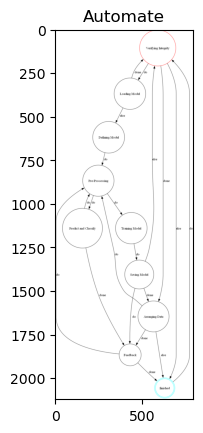

In [28]:
A.imshow()